In [134]:

import os
os.chdir("F:/PythonProject/MirrorMind")  # Укажите путь к корню проекта
print(os.getcwd())  # Проверьте, что директория изменилась


F:\PythonProject\MirrorMind


In [135]:
import os
print(os.getcwd())  # Покажет текущую рабочую директорию Jupyter



F:\PythonProject\MirrorMind


In [10]:
import json
from config import DATA_FILES  # Импортируем словарь с путями к файлам

# Определяем функцию load_chat_data
def load_chat_data(file_path):
    """
    Загружает данные из указанного файла JSON.
    :param file_path: Путь к файлу JSON.
    :return: JSON-объект с данными.
    """
    try:
        with open(file_path, 'r', encoding='utf-8') as f:
            data = json.load(f)
            print("Файл успешно загружен.")
            print("Формат: <json>")
            return data
    except Exception as e:
        print(f"Ошибка при загрузке файла: {e}")
        raise

if __name__ == "__main__":
    try:
        # Загружаем данные в переменную data
        data = load_chat_data(DATA_FILES["GN"])  # Передаём путь к файлу из словаря DATA_FILES
        print("Данные успешно загружены.")
    except Exception as e:
        print(f"Произошла ошибка: {e}")


Файл успешно загружен.
Формат: <json>
Данные успешно загружены.


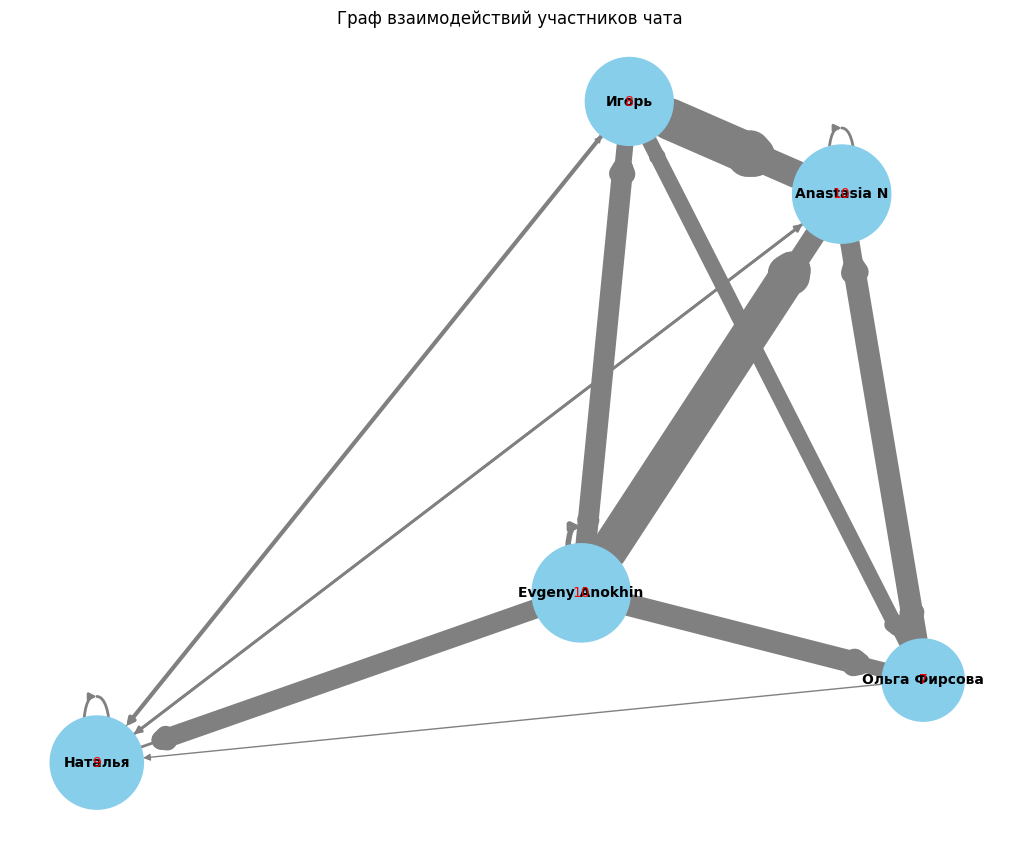

[('Ольга Фирсова', 'Игорь', 8), ('Ольга Фирсова', 'Anastasia N', 16), ('Ольга Фирсова', 'Evgeny Anokhin', 11), ('Ольга Фирсова', 'Наталья', 1), ('Игорь', 'Ольга Фирсова', 11), ('Игорь', 'Anastasia N', 30), ('Игорь', 'Evgeny Anokhin', 12), ('Игорь', 'Наталья', 3), ('Anastasia N', 'Игорь', 20), ('Anastasia N', 'Ольга Фирсова', 14), ('Anastasia N', 'Anastasia N', 2), ('Anastasia N', 'Evgeny Anokhin', 15), ('Anastasia N', 'Наталья', 2), ('Evgeny Anokhin', 'Anastasia N', 27), ('Evgeny Anokhin', 'Evgeny Anokhin', 4), ('Evgeny Anokhin', 'Игорь', 15), ('Evgeny Anokhin', 'Ольга Фирсова', 16), ('Evgeny Anokhin', 'Наталья', 14), ('Наталья', 'Evgeny Anokhin', 2), ('Наталья', 'Anastasia N', 2), ('Наталья', 'Наталья', 2), ('Наталья', 'Игорь', 1)]


In [22]:
import json
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import os

# Функция для загрузки данных из JSON файла
def load_chat_data(file_path):
    """
    Загружает данные чата из JSON-файла и возвращает DataFrame сообщений.
    """
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            data = json.load(file)
        messages = pd.DataFrame(data['messages'])
        return messages
    except Exception as e:
        print(f"Ошибка загрузки данных: {e}")
        return None

# Функция для построения графа взаимодействий
def build_interaction_graph(messages):
    """
    Создает граф взаимодействий участников чата на основе ответов на сообщения.
    """
    graph = nx.DiGraph()
    # Добавляем связи в граф
    for _, msg in messages.iterrows():
        if 'reply_to_message_id' in msg and msg['reply_to_message_id']:
            reply_author = messages.loc[messages['id'] == msg['reply_to_message_id'], 'from']
            if not reply_author.empty:
                sender = msg['from']
                receiver = reply_author.iloc[0]
                if graph.has_edge(sender, receiver):
                    graph[sender][receiver]['weight'] += 1
                else:
                    graph.add_edge(sender, receiver, weight=1)
    return graph

# Функция для визуализации графа
def visualize_graph(graph):
    """
    Визуализирует граф взаимодействий с размерами узлов по активности
    и подписями числовых значений.
    """
    plt.figure(figsize=(10, 8))
    pos = nx.spring_layout(graph)

    # Размер узлов пропорционален их степени (активности)
    node_sizes = [graph.degree(node) * 500 for node in graph.nodes()]
    weights = [graph[u][v]['weight'] for u, v in graph.edges()]

    # Рисуем граф
    nx.draw(
        graph, pos, with_labels=True, node_size=node_sizes, 
        node_color='skyblue', font_size=10, font_weight='bold', 
        edge_color='gray', width=weights
    )

    # Добавляем числовые подписи
    labels = {node: f"{graph.degree(node)}" for node in graph.nodes()}
    nx.draw_networkx_labels(graph, pos, labels=labels, font_size=10, font_color='red')

    plt.title("Граф взаимодействий участников чата")
    plt.show()


# Основная программа
if __name__ == "__main__":
    # Путь к файлу данных
    current_dir = os.getcwd()
    file_path = os.path.join(current_dir, 'data', 'sample.json')  # Укажите правильный путь к вашему JSON

    # Загружаем данные
    chat_data = load_chat_data(file_path)

    if chat_data is not None:
        # Построение графа взаимодействий
        interaction_graph = build_interaction_graph(chat_data)
    
        # Визуализация графа
        visualize_graph(interaction_graph)
    
        # Подсчет взаимодействий
        interaction_counts = [(u, v, d['weight']) for u, v, d in interaction_graph.edges(data=True)]
        print(interaction_counts)



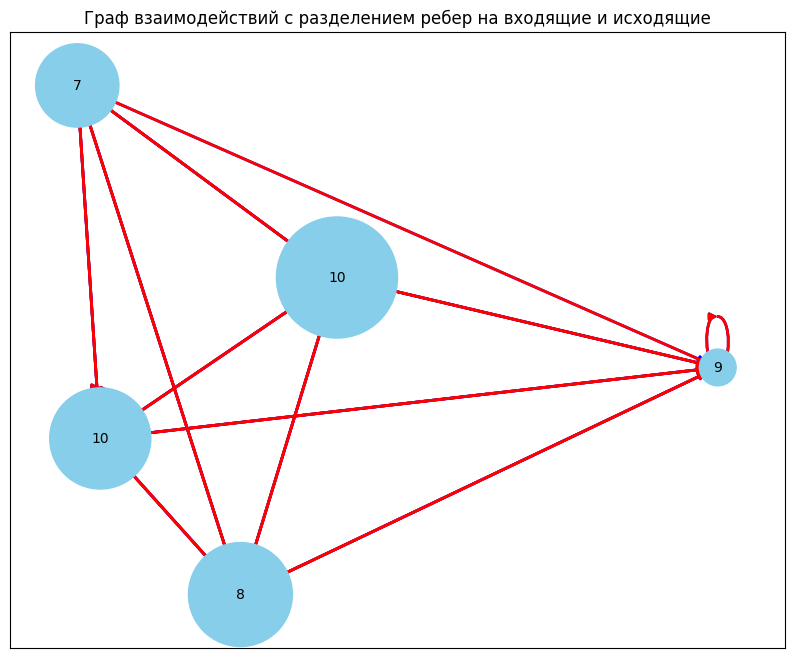

[('Ольга Фирсова', 'Игорь', 8), ('Ольга Фирсова', 'Anastasia N', 16), ('Ольга Фирсова', 'Evgeny Anokhin', 11), ('Ольга Фирсова', 'Наталья', 1), ('Игорь', 'Ольга Фирсова', 11), ('Игорь', 'Anastasia N', 30), ('Игорь', 'Evgeny Anokhin', 12), ('Игорь', 'Наталья', 3), ('Anastasia N', 'Игорь', 20), ('Anastasia N', 'Ольга Фирсова', 14), ('Anastasia N', 'Anastasia N', 2), ('Anastasia N', 'Evgeny Anokhin', 15), ('Anastasia N', 'Наталья', 2), ('Evgeny Anokhin', 'Anastasia N', 27), ('Evgeny Anokhin', 'Evgeny Anokhin', 4), ('Evgeny Anokhin', 'Игорь', 15), ('Evgeny Anokhin', 'Ольга Фирсова', 16), ('Evgeny Anokhin', 'Наталья', 14), ('Наталья', 'Evgeny Anokhin', 2), ('Наталья', 'Anastasia N', 2), ('Наталья', 'Наталья', 2), ('Наталья', 'Игорь', 1)]


In [4]:
import json
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import os

# Функция для загрузки данных из JSON файла
def load_chat_data(file_path):
    """
    Загружает данные чата из JSON-файла и возвращает DataFrame сообщений.
    """
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            data = json.load(file)
        messages = pd.DataFrame(data['messages'])
        return messages
    except Exception as e:
        print(f"Ошибка загрузки данных: {e}")
        return None

# Функция для построения графа взаимодействий
def build_interaction_graph(messages):
    """
    Создает граф взаимодействий участников чата на основе ответов на сообщения.
    """
    graph = nx.DiGraph()
    # Добавляем связи в граф
    for _, msg in messages.iterrows():
        if 'reply_to_message_id' in msg and msg['reply_to_message_id']:
            reply_author = messages.loc[messages['id'] == msg['reply_to_message_id'], 'from']
            if not reply_author.empty:
                sender = msg['from']
                receiver = reply_author.iloc[0]
                if graph.has_edge(sender, receiver):
                    graph[sender][receiver]['weight'] += 1
                else:
                    graph.add_edge(sender, receiver, weight=1)
    return graph

# Функция для разделения ребер на входящие и исходящие
def calculate_edge_colors(graph):
    """
    Возвращает списки исходящих и входящих ребер.
    """
    edges_out = [(u, v) for u, v in graph.edges()]
    edges_in = [(v, u) for u, v in graph.edges()]
    return edges_out, edges_in

# Функция для визуализации графа с разделением ребер
def visualize_split_edges(graph):
    """
    Визуализирует граф с разделением ребер на входящие и исходящие.
    """
    plt.figure(figsize=(10, 8))
    pos = nx.spring_layout(graph)

    # Рассчитываем размеры узлов
    node_sizes = [sum(data['weight'] for _, _, data in graph.edges(node, data=True)) * 100 for node in graph.nodes()]
    
    # Разделяем ребра
    edges_out, edges_in = calculate_edge_colors(graph)

    # Рисуем исходящие ребра (синий цвет)
    nx.draw_networkx_edges(graph, pos, edgelist=edges_out, edge_color="blue", arrows=True, width=2)

    # Рисуем входящие ребра (красный цвет)
    nx.draw_networkx_edges(graph, pos, edgelist=edges_in, edge_color="red", arrows=True, width=2)

    # Рисуем узлы
    nx.draw_networkx_nodes(graph, pos, node_size=node_sizes, node_color="skyblue")

    # Рисуем подписи узлов
    labels = {node: f"{graph.degree(node)}" for node in graph.nodes()}
    nx.draw_networkx_labels(graph, pos, labels=labels, font_size=10, font_color="black")

    plt.title("Граф взаимодействий с разделением ребер на входящие и исходящие")
    plt.show()

# Основная программа
if __name__ == "__main__":
    # Путь к файлу данных
    current_dir = os.getcwd()
    file_path = os.path.join(current_dir, 'data', 'sample.json')  # Укажите правильный путь к вашему JSON

    # Загружаем данные
    chat_data = load_chat_data(file_path)

    if chat_data is not None:
        # Построение графа взаимодействий
        interaction_graph = build_interaction_graph(chat_data)
    
        # Визуализация графа
        visualize_split_edges(interaction_graph)
    
        # Подсчет взаимодействий
        interaction_counts = [(u, v, d['weight']) for u, v, d in interaction_graph.edges(data=True)]
        print(interaction_counts)


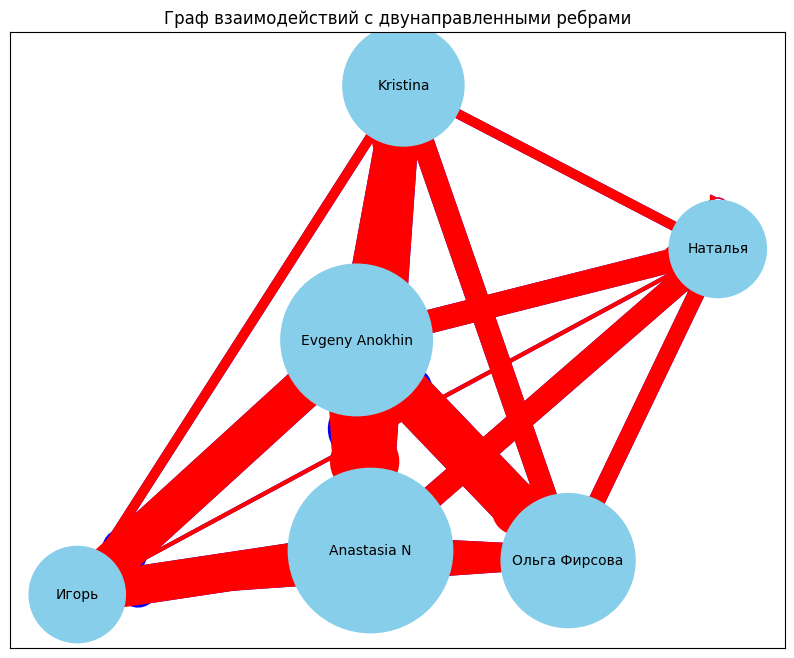

[('Игорь', 'Ольга Фирсова', 6), ('Игорь', 'Anastasia N', 18), ('Игорь', 'Evgeny Anokhin', 19), ('Игорь', 'Наталья', 1), ('Игорь', 'Kristina', 4), ('Ольга Фирсова', 'Anastasia N', 20), ('Ольга Фирсова', 'Игорь', 10), ('Ольга Фирсова', 'Evgeny Anokhin', 35), ('Ольга Фирсова', 'Наталья', 12), ('Ольга Фирсова', 'Kristina', 16), ('Anastasia N', 'Игорь', 28), ('Anastasia N', 'Ольга Фирсова', 21), ('Anastasia N', 'Evgeny Anokhin', 46), ('Anastasia N', 'Наталья', 17), ('Anastasia N', 'Kristina', 27), ('Anastasia N', 'Anastasia N', 1), ('Evgeny Anokhin', 'Anastasia N', 41), ('Evgeny Anokhin', 'Игорь', 30), ('Evgeny Anokhin', 'Ольга Фирсова', 16), ('Evgeny Anokhin', 'Evgeny Anokhin', 1), ('Evgeny Anokhin', 'Наталья', 15), ('Evgeny Anokhin', 'Kristina', 16), ('Наталья', 'Evgeny Anokhin', 17), ('Наталья', 'Anastasia N', 15), ('Наталья', 'Наталья', 1), ('Наталья', 'Игорь', 3), ('Наталья', 'Kristina', 7), ('Наталья', 'Ольга Фирсова', 6), ('Kristina', 'Anastasia N', 24), ('Kristina', 'Игорь', 7), ('K

In [11]:
import json
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Функция для загрузки данных из JSON файла
def load_chat_data(file_path):
    """
    Загружает данные чата из JSON-файла и возвращает DataFrame сообщений.
    """
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            data = json.load(file)
        messages = pd.DataFrame(data['messages'])
        return messages
    except Exception as e:
        print(f"Ошибка загрузки данных: {e}")
        return None

# Функция для построения графа взаимодействий
def build_interaction_graph(messages):
    """
    Создает граф взаимодействий участников чата на основе ответов на сообщения.
    """
    graph = nx.DiGraph()
    for _, msg in messages.iterrows():
        if 'reply_to_message_id' in msg and msg['reply_to_message_id']:
            reply_author = messages.loc[messages['id'] == msg['reply_to_message_id'], 'from']
            if not reply_author.empty:
                sender = msg['from']
                receiver = reply_author.iloc[0]
                if graph.has_edge(sender, receiver):
                    graph[sender][receiver]['weight'] += 1
                else:
                    graph.add_edge(sender, receiver, weight=1)
    return graph

# Функция для визуализации графа
def visualize_split_edges(graph):
    """
    Визуализирует граф с разделением ребер на входящие и исходящие.
    Отображает два направленных ребра между каждыми двумя узлами (если взаимодействия есть).
    """
    plt.figure(figsize=(10, 8))
    pos = nx.spring_layout(graph, k=0.5, iterations=100)

    # Рассчитываем размеры узлов
    node_sizes = [
        sum(data['weight'] for _, _, data in graph.edges(node, data=True)) * 100
        for node in graph.nodes()
    ]
    
    # Разделяем ребра
    edges_out = [(u, v, data['weight']) for u, v, data in graph.edges(data=True)]
    edges_in = [(v, u, data['weight']) for u, v, data in graph.edges(data=True)]

    # Рисуем исходящие ребра (синий цвет)
    nx.draw_networkx_edges(
        graph, pos, edgelist=[(u, v) for u, v, _ in edges_out],
        edge_color="blue", arrows=True, width=[w for _, _, w in edges_out]
    )

    # Рисуем входящие ребра (красный цвет)
    nx.draw_networkx_edges(
        graph, pos, edgelist=[(u, v) for u, v, _ in edges_in],
        edge_color="red", arrows=True, width=[w for _, _, w in edges_in]
    )

    # Рисуем узлы
    nx.draw_networkx_nodes(graph, pos, node_size=node_sizes, node_color="skyblue")

    # Добавляем имена участников вместо числовых значений
    labels = {node: node for node in graph.nodes()}
    nx.draw_networkx_labels(graph, pos, labels=labels, font_size=10, font_color="black")

    plt.title("Граф взаимодействий с двунаправленными ребрами")
    plt.show()

def clean_messages(messages):
    """
    Удаляет строки с отсутствующими отправителями или reply_to_message_id.
    """
    messages = messages.dropna(subset=['from', 'reply_to_message_id'])
    return messages

# Основная программа
# Путь к файлу данных
file_path = "data/GN.json"  # Укажите правильный путь к вашему JSON

# Загружаем данные
chat_data = load_chat_data(file_path)
chat_data = clean_messages(chat_data)


if chat_data is not None:
    # Построение графа взаимодействий
    interaction_graph = build_interaction_graph(chat_data)

    # Визуализация графа
    visualize_split_edges(interaction_graph)

    # Подсчет взаимодействий
    interaction_counts = [(u, v, d['weight']) for u, v, d in interaction_graph.edges(data=True)]
    print(interaction_counts)


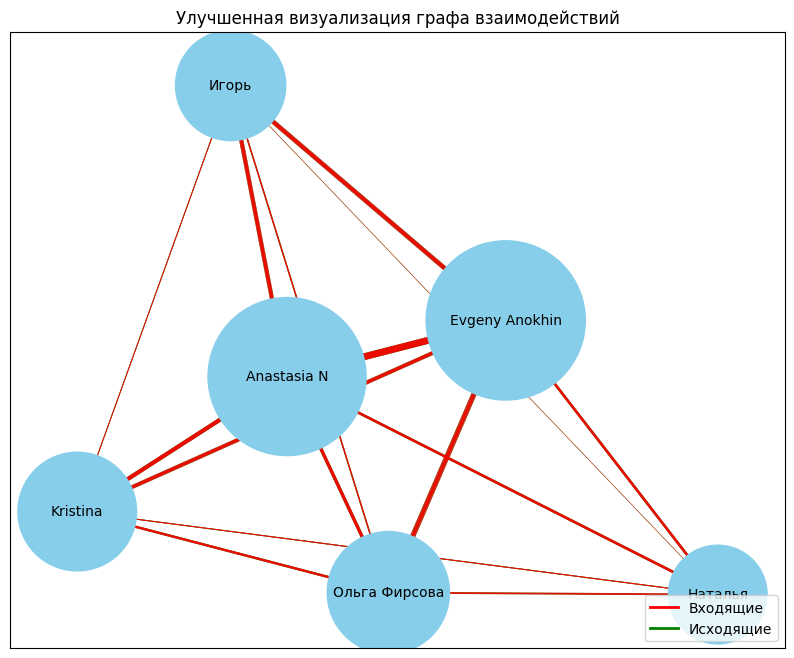

[('Игорь', 'Ольга Фирсова', 6), ('Игорь', 'Anastasia N', 18), ('Игорь', 'Evgeny Anokhin', 19), ('Игорь', 'Наталья', 1), ('Игорь', 'Kristina', 4), ('Ольга Фирсова', 'Anastasia N', 20), ('Ольга Фирсова', 'Игорь', 10), ('Ольга Фирсова', 'Evgeny Anokhin', 35), ('Ольга Фирсова', 'Наталья', 12), ('Ольга Фирсова', 'Kristina', 16), ('Anastasia N', 'Игорь', 28), ('Anastasia N', 'Ольга Фирсова', 21), ('Anastasia N', 'Evgeny Anokhin', 46), ('Anastasia N', 'Наталья', 17), ('Anastasia N', 'Kristina', 27), ('Anastasia N', 'Anastasia N', 1), ('Evgeny Anokhin', 'Anastasia N', 41), ('Evgeny Anokhin', 'Игорь', 30), ('Evgeny Anokhin', 'Ольга Фирсова', 16), ('Evgeny Anokhin', 'Evgeny Anokhin', 1), ('Evgeny Anokhin', 'Наталья', 15), ('Evgeny Anokhin', 'Kristina', 16), ('Наталья', 'Evgeny Anokhin', 17), ('Наталья', 'Anastasia N', 15), ('Наталья', 'Наталья', 1), ('Наталья', 'Игорь', 3), ('Наталья', 'Kristina', 7), ('Наталья', 'Ольга Фирсова', 6), ('Kristina', 'Anastasia N', 24), ('Kristina', 'Игорь', 7), ('K

In [30]:
import json
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Функция для загрузки данных из JSON файла
def load_chat_data(file_path):
    """
    Загружает данные чата из JSON-файла и возвращает DataFrame сообщений.
    """
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            data = json.load(file)
        messages = pd.DataFrame(data['messages'])
        return messages
    except Exception as e:
        print(f"Ошибка загрузки данных: {e}")
        return None

# Функция для построения графа взаимодействий
def build_interaction_graph(messages):
    """
    Создает граф взаимодействий участников чата на основе ответов на сообщения.
    """
    graph = nx.DiGraph()
    for _, msg in messages.iterrows():
        if 'reply_to_message_id' in msg and msg['reply_to_message_id']:
            reply_author = messages.loc[messages['id'] == msg['reply_to_message_id'], 'from']
            if not reply_author.empty:
                sender = msg['from']
                receiver = reply_author.iloc[0]
                if graph.has_edge(sender, receiver):
                    graph[sender][receiver]['weight'] += 1
                else:
                    graph.add_edge(sender, receiver, weight=1)
    return graph

# Функция для визуализации графа
def visualize_split_edges(graph):
    """
    Улучшенная визуализация графа взаимодействий с учетом видимости ребер, стрелок и нормализации веса ребер.
    """
    plt.figure(figsize=(10, 8))
    pos = nx.spring_layout(graph, k=0.5, iterations=100)

    # Рассчитываем размеры узлов с учетом всех взаимодействий
    node_sizes = [
        (
            sum(data['weight'] for _, _, data in graph.in_edges(node, data=True)) +
            sum(data['weight'] for _, _, data in graph.out_edges(node, data=True))
        ) * 50  # Масштабируем для визуализации
        for node in graph.nodes()
    ]

    # Убираем самоссылающиеся ребра
    edges_out = []
    edges_in = []
    for u, v, data in graph.edges(data=True):
        if u != v:
            edges_out.append((u, v, data['weight']))
            edges_in.append((v, u, data['weight']))

    # Нормализация веса ребер
    max_weight = max(data['weight'] for _, _, data in graph.edges(data=True)) if graph.edges else 1
    normalized_edges_out = [(u, v, weight / max_weight * 5) for u, v, weight in edges_out]
    normalized_edges_in = [(u, v, weight / max_weight * 5) for u, v, weight in edges_in]

    # Рисуем исходящие ребра (зеленый цвет, с прозрачностью и стрелками)
    nx.draw_networkx_edges(
        graph, pos, edgelist=[(u, v) for u, v, _ in normalized_edges_out], edge_color="green",
        arrows=True, arrowstyle="-|>",
        width=[weight for _, _, weight in normalized_edges_out], alpha=0.7, arrowsize=20
    )

    # Рисуем входящие ребра (красный цвет, с прозрачностью)
    nx.draw_networkx_edges(
        graph, pos, edgelist=[(u, v) for u, v, _ in normalized_edges_in], edge_color="red",
        arrows=False,
        width=[weight for _, _, weight in normalized_edges_in], alpha=0.7
    )

    # Рисуем узлы после стрелок, чтобы они были на переднем плане
    nx.draw_networkx_nodes(graph, pos, node_size=node_sizes, node_color="skyblue")

    # Добавляем имена участников вместо числовых значений
    labels = {node: node for node in graph.nodes()}
    nx.draw_networkx_labels(graph, pos, labels=labels, font_size=10, font_color="black")

    # Добавляем легенду для объяснения цветов
    red_patch = plt.Line2D([0], [0], color="red", lw=2, label="Входящие")
    green_patch = plt.Line2D([0], [0], color="green", lw=2, label="Исходящие")
    plt.legend(handles=[red_patch, green_patch], loc="lower right")

    plt.title("Улучшенная визуализация графа взаимодействий")
    plt.show()






def clean_messages(messages):
    """
    Удаляет строки с отсутствующими отправителями или reply_to_message_id.
    """
    messages = messages.dropna(subset=['from', 'reply_to_message_id'])
    return messages

# Основная программа
# Путь к файлу данных
file_path = "data/GN.json"  # Укажите правильный путь к вашему JSON

# Загружаем данные
chat_data = load_chat_data(file_path)
chat_data = clean_messages(chat_data)


if chat_data is not None:
    # Построение графа взаимодействий
    interaction_graph = build_interaction_graph(chat_data)

    # Визуализация графа
    visualize_split_edges(interaction_graph)

    # Подсчет взаимодействий
    interaction_counts = [(u, v, d['weight']) for u, v, d in interaction_graph.edges(data=True)]
    print(interaction_counts)


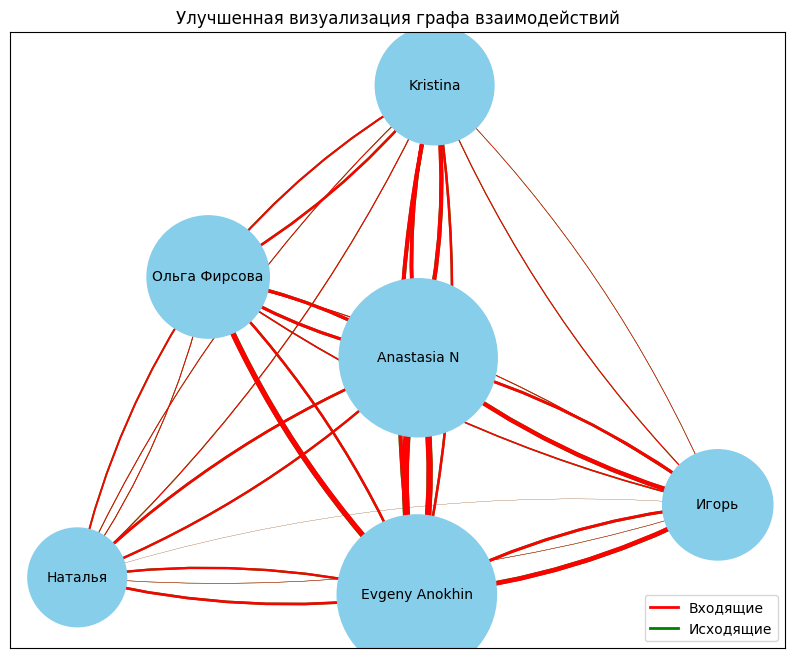

[('Игорь', 'Ольга Фирсова', 6), ('Игорь', 'Anastasia N', 18), ('Игорь', 'Evgeny Anokhin', 19), ('Игорь', 'Наталья', 1), ('Игорь', 'Kristina', 4), ('Ольга Фирсова', 'Anastasia N', 20), ('Ольга Фирсова', 'Игорь', 10), ('Ольга Фирсова', 'Evgeny Anokhin', 35), ('Ольга Фирсова', 'Наталья', 12), ('Ольга Фирсова', 'Kristina', 16), ('Anastasia N', 'Игорь', 28), ('Anastasia N', 'Ольга Фирсова', 21), ('Anastasia N', 'Evgeny Anokhin', 46), ('Anastasia N', 'Наталья', 17), ('Anastasia N', 'Kristina', 27), ('Anastasia N', 'Anastasia N', 1), ('Evgeny Anokhin', 'Anastasia N', 41), ('Evgeny Anokhin', 'Игорь', 30), ('Evgeny Anokhin', 'Ольга Фирсова', 16), ('Evgeny Anokhin', 'Evgeny Anokhin', 1), ('Evgeny Anokhin', 'Наталья', 15), ('Evgeny Anokhin', 'Kristina', 16), ('Наталья', 'Evgeny Anokhin', 17), ('Наталья', 'Anastasia N', 15), ('Наталья', 'Наталья', 1), ('Наталья', 'Игорь', 3), ('Наталья', 'Kristina', 7), ('Наталья', 'Ольга Фирсова', 6), ('Kristina', 'Anastasia N', 24), ('Kristina', 'Игорь', 7), ('K

In [48]:
import json
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Функция для загрузки данных из JSON файла
def load_chat_data(file_path):
    """
    Загружает данные чата из JSON-файла и возвращает DataFrame сообщений.
    """
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            data = json.load(file)
        messages = pd.DataFrame(data['messages'])
        return messages
    except Exception as e:
        print(f"Ошибка загрузки данных: {e}")
        return None

# Функция для построения графа взаимодействий
def build_interaction_graph(messages):
    """
    Создает граф взаимодействий участников чата на основе ответов на сообщения.
    """
    graph = nx.DiGraph()
    for _, msg in messages.iterrows():
        if 'reply_to_message_id' in msg and msg['reply_to_message_id']:
            reply_author = messages.loc[messages['id'] == msg['reply_to_message_id'], 'from']
            if not reply_author.empty:
                sender = msg['from']
                receiver = reply_author.iloc[0]
                if graph.has_edge(sender, receiver):
                    graph[sender][receiver]['weight'] += 1
                else:
                    graph.add_edge(sender, receiver, weight=1)
    return graph

# Функция для визуализации графа
def visualize_split_edges(graph):
    """
    Улучшенная визуализация графа взаимодействий с учетом видимости ребер, стрелок и нормализации веса ребер.
    """
    plt.figure(figsize=(10, 8))
    pos = nx.spring_layout(graph, k=0.5, iterations=100)

    # Рассчитываем размеры узлов с учетом всех взаимодействий
    node_sizes = [
        (
            sum(data['weight'] for _, _, data in graph.in_edges(node, data=True)) +
            sum(data['weight'] for _, _, data in graph.out_edges(node, data=True))
        ) * 50  # Масштабируем для визуализации
        for node in graph.nodes()
    ]

    # Убираем самоссылающиеся ребра
    edges_out = []
    edges_in = []
    for u, v, data in graph.edges(data=True):
        if u != v:
            edges_out.append((u, v, data['weight']))
            edges_in.append((v, u, data['weight']))

    # Нормализация веса ребер
    max_weight = max(data['weight'] for _, _, data in graph.edges(data=True)) if graph.edges else 1
    normalized_edges_out = [(u, v, weight / max_weight * 5) for u, v, weight in edges_out]
    normalized_edges_in = [(u, v, weight / max_weight * 5) for u, v, weight in edges_in]

    # Рисуем исходящие ребра (зеленый цвет, с прозрачностью и стрелками, со смещением)
    nx.draw_networkx_edges(
        graph, pos, edgelist=[(u, v) for u, v, _ in normalized_edges_out], edge_color="green",
        arrows=True, arrowstyle="-|>", connectionstyle="arc3,rad=0.1",
        width=[weight for _, _, weight in normalized_edges_out], alpha=1, arrowsize=20
    )

    # Рисуем входящие ребра (красный цвет, с прозрачностью и стрелками, со смещением)
    nx.draw_networkx_edges(
        graph, pos, edgelist=[(u, v) for u, v, _ in normalized_edges_in], edge_color="red",
        arrows=True, arrowstyle="-|>", connectionstyle="arc3,rad=-0.1",
        width=[weight for _, _, weight in normalized_edges_in], alpha=1, arrowsize=20
    )

    # Рисуем узлы после стрелок, чтобы они были на переднем плане
    nx.draw_networkx_nodes(graph, pos, node_size=node_sizes, node_color="skyblue")

    # Добавляем имена участников вместо числовых значений
    labels = {node: node for node in graph.nodes()}
    nx.draw_networkx_labels(graph, pos, labels=labels, font_size=10, font_color="black")

    # Добавляем легенду для объяснения цветов
    red_patch = plt.Line2D([0], [0], color="red", lw=2, label="Входящие")
    green_patch = plt.Line2D([0], [0], color="green", lw=2, label="Исходящие")
    plt.legend(handles=[red_patch, green_patch], loc="lower right")

    plt.title("Улучшенная визуализация графа взаимодействий")
    plt.show()





def clean_messages(messages):
    """
    Удаляет строки с отсутствующими отправителями или reply_to_message_id.
    """
    messages = messages.dropna(subset=['from', 'reply_to_message_id'])
    return messages

# Основная программа
# Путь к файлу данных
file_path = "data/GN.json"  # Укажите правильный путь к вашему JSON

# Загружаем данные
chat_data = load_chat_data(file_path)
chat_data = clean_messages(chat_data)


if chat_data is not None:
    # Построение графа взаимодействий
    interaction_graph = build_interaction_graph(chat_data)

    # Визуализация графа
    visualize_split_edges(interaction_graph)

    # Подсчет взаимодействий
    interaction_counts = [(u, v, d['weight']) for u, v, d in interaction_graph.edges(data=True)]
    print(interaction_counts)




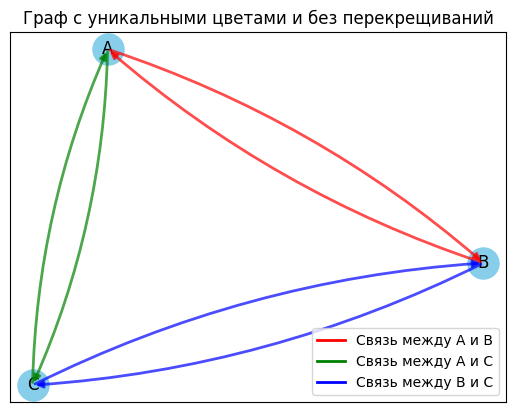

In [47]:
import matplotlib.pyplot as plt
import networkx as nx
import itertools

# Создаём граф
graph = nx.DiGraph()

# Добавляем рёбра между узлами
graph.add_edge("A", "B", weight=1)
graph.add_edge("B", "A", weight=1)
graph.add_edge("B", "C", weight=1)
graph.add_edge("C", "B", weight=1)
graph.add_edge("C", "A", weight=1)
graph.add_edge("A", "C", weight=1)

# Генерация уникальных цветов для каждой пары
color_palette = itertools.cycle(["red", "green", "blue", "orange", "purple", "brown"])
edge_colors = {}  # Словарь для хранения цвета каждой пары узлов

for u, v in graph.edges():
    if (u, v) not in edge_colors and (v, u) not in edge_colors:
        edge_colors[(u, v)] = next(color_palette)

# Визуализация
pos = nx.spring_layout(graph, seed=42)

# Отрисовка узлов
nx.draw_networkx_nodes(graph, pos, node_size=500, node_color="skyblue", label="Узлы")
nx.draw_networkx_labels(graph, pos)

# Рисуем рёбра с разными кривизнами
seen_pairs = set()
for u, v in graph.edges():
    if (u, v) not in seen_pairs and (v, u) not in seen_pairs:  # Гарантируем обработку только одной пары
        color = edge_colors[(u, v)]  # Цвет для пары узлов

        # Используем разные кривизны для рёбер
        rad1 = -0.1  # Кривизна для первого ребра
        rad2 = -0.1   # Кривизна для второго ребра

        # Рисуем два рёбра между узлами одного цвета
        plt.annotate(
            "",
            xy=pos[v],  # Конец первого ребра
            xytext=pos[u],  # Начало первого ребра
            arrowprops=dict(
                arrowstyle="-|>",
                color=color,
                lw=2.0,
                alpha=0.7,
                connectionstyle=f"arc3,rad={rad1}",  # Первая кривизна
            ),
        )
        plt.annotate(
            "",
            xy=pos[u],  # Конец второго ребра
            xytext=pos[v],  # Начало второго ребра
            arrowprops=dict(
                arrowstyle="-|>",
                color=color,
                lw=2.0,
                alpha=0.7,
                connectionstyle=f"arc3,rad={rad2}",  # Вторая кривизна
            ),
        )

        # Отмечаем пару как обработанную
        seen_pairs.add((u, v))
        seen_pairs.add((v, u))

# Легенда
legend_patches = [plt.Line2D([0], [0], color=color, lw=2, label=f"Связь между {pair[0]} и {pair[1]}") for pair, color in edge_colors.items()]
plt.legend(handles=legend_patches, loc="lower right")

plt.title("Граф с уникальными цветами и без перекрещиваний")
plt.show()


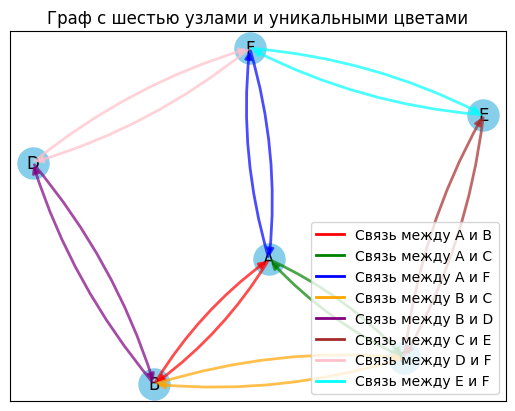

In [48]:
import matplotlib.pyplot as plt
import networkx as nx
import itertools

# Создаём граф с шестью узлами
graph = nx.DiGraph()

# Добавляем рёбра между узлами
nodes = ["A", "B", "C", "D", "E", "F"]
edges = [
    ("A", "B"), ("B", "A"),
    ("A", "C"), ("C", "A"),
    ("B", "C"), ("C", "B"),
    ("B", "D"), ("D", "B"),
    ("C", "E"), ("E", "C"),
    ("D", "F"), ("F", "D"),
    ("E", "F"), ("F", "E"),
    ("A", "F"), ("F", "A")
]

for edge in edges:
    graph.add_edge(*edge)

# Генерация уникальных цветов для каждой пары
color_palette = itertools.cycle(["red", "green", "blue", "orange", "purple", "brown", "pink", "cyan", "magenta", "yellow"])
edge_colors = {}  # Словарь для хранения цвета каждой пары узлов

for u, v in graph.edges():
    if (u, v) not in edge_colors and (v, u) not in edge_colors:
        edge_colors[(u, v)] = next(color_palette)

# Визуализация
pos = nx.spring_layout(graph, seed=42)

# Отрисовка узлов
nx.draw_networkx_nodes(graph, pos, node_size=500, node_color="skyblue", label="Узлы")
nx.draw_networkx_labels(graph, pos)

# Рисуем рёбра с одинаковой кривизной
seen_pairs = set()
rad = -0.1  # Фиксированная кривизна

for u, v in graph.edges():
    if (u, v) not in seen_pairs and (v, u) not in seen_pairs:  # Гарантируем обработку только одной пары
        color = edge_colors[(u, v)]  # Цвет для пары узлов

        # Рисуем два рёбра между узлами одного цвета
        plt.annotate(
            "",
            xy=pos[v],  # Конец первого ребра
            xytext=pos[u],  # Начало первого ребра
            arrowprops=dict(
                arrowstyle="-|>",
                color=color,
                lw=2.0,
                alpha=0.7,
                connectionstyle=f"arc3,rad={rad}",  # Одинаковая кривизна
            ),
        )
        plt.annotate(
            "",
            xy=pos[u],  # Конец второго ребра
            xytext=pos[v],  # Начало второго ребра
            arrowprops=dict(
                arrowstyle="-|>",
                color=color,
                lw=2.0,
                alpha=0.7,
                connectionstyle=f"arc3,rad={rad}",  # Одинаковая кривизна
            ),
        )

        # Отмечаем пару как обработанную
        seen_pairs.add((u, v))
        seen_pairs.add((v, u))

# Легенда
legend_patches = [plt.Line2D([0], [0], color=color, lw=2, label=f"Связь между {pair[0]} и {pair[1]}") for pair, color in edge_colors.items()]
plt.legend(handles=legend_patches, loc="lower right")

plt.title("Граф с шестью узлами и уникальными цветами")
plt.show()


In [123]:
import matplotlib.pyplot as plt
import networkx as nx
import itertools

# Создаём граф с весами
graph = nx.DiGraph()

# Узлы
nodes = ["A", "B", "C", "D", "E", "F"]

# Рёбра с весами (активность взаимодействий)
edges = [
    ("A", "B", 10), ("B", "A", 20),
    ("A", "C", 5), ("C", "A", 15),
    ("B", "C", 25), ("C", "B", 10),
    ("B", "D", 30), ("D", "B", 5),
    ("C", "E", 20), ("E", "C", 10),
    ("D", "F", 15), ("F", "D", 25),
    ("E", "F", 5), ("F", "E", 10),
    ("A", "F", 35), ("F", "A", 40)
]

# Добавляем рёбра в граф
for u, v, weight in edges:
    graph.add_edge(u, v, weight=weight)

# Генерация уникальных цветов для каждой пары
color_palette = itertools.cycle(["red", "green", "blue", "orange", "purple", "brown", "pink", "cyan", "magenta", "yellow"])
edge_colors = {}  # Словарь для хранения цвета каждой пары узлов

for u, v in graph.edges():
    if (u, v) not in edge_colors and (v, u) not in edge_colors:
        edge_colors[(u, v)] = next(color_palette)

# Визуализация
pos = nx.spring_layout(graph, seed=42)

# 1. Нормируем толщину рёбер
weights = [graph[u][v]['weight'] for u, v in graph.edges()]
min_width, max_width = 1, 5
norm_weights = {edge: min_width + (weight - min(weights)) * (max_width - min_width) / (max(weights) - min(weights)) for edge, weight in zip(graph.edges(), weights)}

# 2. Нормируем размер узлов
node_sizes = {}
activity = {node: sum(graph[u][v]['weight'] for u, v in graph.edges(node)) for node in graph.nodes()}
min_size, max_size = 100, 1000
for node in graph.nodes():
    node_sizes[node] = min_size + (activity[node] - min(activity.values())) * (max_size - min_size) / (max(activity.values()) - min(activity.values()))

# Отрисовка узлов
nx.draw_networkx_nodes(graph, pos, node_size=[node_sizes[node] for node in graph.nodes()], node_color="skyblue", label="Узлы")

# Добавление текста узлов с фоном
for node, (x, y) in pos.items():
    plt.text(
        x, y, node,
        fontsize=10,
        ha='center',
        va='center',
        bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3')  # Фон под текстом
    )

# Рисуем рёбра с разной толщиной
rad = -0.1  # Фиксированная кривизна
for u, v in graph.edges():
    color = edge_colors[(u, v) if (u, v) in edge_colors else (v, u)]  # Цвет для пары узлов
    width = norm_weights[(u, v)]  # Толщина ребра

    # Рисуем ребро (A → B или B → A)
    plt.annotate(
        "",
        xy=pos[v],  # Конец ребра
        xytext=pos[u],  # Начало ребра
        arrowprops=dict(
            arrowstyle="-|>",
            color=color,
            lw=width,  # Индивидуальная толщина
            alpha=0.7,
            connectionstyle=f"arc3,rad={rad}",  # Одинаковая кривизна
        ),
    )

plt.title("Граф с весами рёбер и узлов")
plt.show()


In [126]:
########### ДИНАМИЧНЫЙ ГРАФ #####################
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import networkx as nx
import pandas as pd
import itertools

# Генерация данных с временными шагами
data = [
    {"time": 1, "source": "A", "target": "B", "weight": 5},
    {"time": 2, "source": "A", "target": "C", "weight": 3},
    {"time": 3, "source": "B", "target": "C", "weight": 7},
    {"time": 4, "source": "C", "target": "D", "weight": 2},
    {"time": 5, "source": "D", "target": "E", "weight": 10},
    {"time": 6, "source": "E", "target": "F", "weight": 6},
    {"time": 7, "source": "A", "target": "F", "weight": 4},
    {"time": 8, "source": "A", "target": "B", "weight": 3},
    {"time": 9, "source": "C", "target": "E", "weight": 2},
    {"time": 10, "source": "D", "target": "A", "weight": 5},
    {"time": 11, "source": "F", "target": "B", "weight": 4},
    {"time": 12, "source": "B", "target": "D", "weight": 3},
]

# Преобразуем в DataFrame
df = pd.DataFrame(data)

# Определяем всех участников
nodes = list(set(df["source"]).union(set(df["target"])))

# Финальный граф (все рёбра)
final_graph = nx.DiGraph()
for _, row in df.iterrows():
    final_graph.add_edge(row["source"], row["target"], weight=row["weight"])

# Фиксируем расположение узлов
pos = nx.spring_layout(final_graph, seed=42)

# Генерация уникальных цветов для каждой пары узлов
color_palette = itertools.cycle(["red", "blue", "green", "orange", "purple", "brown", "pink", "cyan", "magenta", "yellow"])
edge_colors = {edge: next(color_palette) for edge in final_graph.edges()}

# Функция нормализации значений
def normalize(value, min_val, max_val, min_size, max_size):
    if min_val == max_val:
        return (min_size + max_size) / 2
    return min_size + (value - min_val) * (max_size - min_size) / (max_val - min_val)

# Анимация
fig, ax = plt.subplots(figsize=(8, 6))

def update(frame):
    ax.clear()
    time_step = frame + 1
    subset = df[df["time"] <= time_step]
    graph = nx.DiGraph()

    # Построение графа для текущего кадра
    for _, row in subset.iterrows():
        if graph.has_edge(row["source"], row["target"]):
            graph[row["source"]][row["target"]]["weight"] += row["weight"]
        else:
            graph.add_edge(row["source"], row["target"], weight=row["weight"])

    # Узлы: вычисляем активность (входящие + исходящие веса)
    node_activity = {node: 0 for node in nodes}
    for u, v, data in graph.edges(data=True):
        node_activity[u] += data["weight"]
        node_activity[v] += data["weight"]

    # Нормируем размеры узлов
    min_activity = min(node_activity.values())
    max_activity = max(node_activity.values())
    node_sizes = {
        node: normalize(node_activity[node], min_activity, max_activity, 100, 1000)
        for node in nodes
    }

    # Нормируем толщину рёбер
    edge_weights = [data["weight"] for _, _, data in graph.edges(data=True)]
    min_weight = min(edge_weights) if edge_weights else 0
    max_weight = max(edge_weights) if edge_weights else 1
    edge_thickness = {
        (u, v): normalize(data["weight"], min_weight, max_weight, 1, 5)
        for u, v, data in graph.edges(data=True)
    }

    # Рисуем узлы
    nx.draw_networkx_nodes(graph, pos, ax=ax,
                           node_size=[node_sizes[node] for node in graph.nodes()],
                           node_color="skyblue")
    nx.draw_networkx_labels(graph, pos, ax=ax, font_size=10,
                            bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

    # Рисуем рёбра
    rad = 0.1  # Кривизна рёбер
    for u, v in graph.edges():
        color = edge_colors.get((u, v), "black")
        weight = edge_thickness.get((u, v), 1)
        reverse_weight = edge_thickness.get((v, u), 1)  # Вес обратного ребра

        # Рисуем ребро в одном направлении
        plt.annotate(
            "",
            xy=pos[v],
            xytext=pos[u],
            arrowprops=dict(
                arrowstyle="-|>",
                color=color,
                lw=weight,
                alpha=0.7,
                connectionstyle=f"arc3,rad={rad}",
            ),
        )
        # Рисуем ребро в обратном направлении
        plt.annotate(
            "",
            xy=pos[u],
            xytext=pos[v],
            arrowprops=dict(
                arrowstyle="-|>",
                color=color,
                lw=reverse_weight,  # Используем обратный вес
                alpha=0.7,
                connectionstyle=f"arc3,rad={rad}",
            ),
        )
    
    ax.set_title(f"Граф на шаге времени {time_step}")
    ax.axis("off")

# Запуск анимации
ani = FuncAnimation(fig, update, frames=max(df["time"]), interval=1000, repeat=False)
plt.show()


In [155]:
import matplotlib.pyplot as plt
from matplotlib.widgets import Button
import networkx as nx
import pandas as pd
import itertools

# Данные для графа
data = [
    {"time": 1, "source": "A", "target": "B", "weight": 5},
    {"time": 2, "source": "A", "target": "C", "weight": 3},
    {"time": 3, "source": "B", "target": "C", "weight": 7},
    {"time": 4, "source": "C", "target": "D", "weight": 2},
    {"time": 5, "source": "D", "target": "E", "weight": 10},
    {"time": 6, "source": "E", "target": "F", "weight": 6},
    {"time": 7, "source": "A", "target": "F", "weight": 4},
    {"time": 8, "source": "A", "target": "B", "weight": 3},
    {"time": 9, "source": "C", "target": "E", "weight": 2},
    {"time": 10, "source": "D", "target": "A", "weight": 5},
    {"time": 11, "source": "F", "target": "B", "weight": 4},
    {"time": 12, "source": "B", "target": "D", "weight": 3},
]

df = pd.DataFrame(data)

# Узлы и граф
nodes = list(set(df["source"]).union(set(df["target"])))
final_graph = nx.DiGraph()
for _, row in df.iterrows():
    final_graph.add_edge(row["source"], row["target"], weight=row["weight"])

# Расположение узлов
pos = nx.spring_layout(final_graph, seed=42)

# Цвета рёбер
color_palette = itertools.cycle(["red", "blue", "green", "orange", "purple"])
edge_colors = {edge: next(color_palette) for edge in final_graph.edges()}

# Функция нормализации
def normalize(value, min_val, max_val, min_size, max_size):
    if min_val == max_val:
        return (min_size + max_size) / 2
    return min_size + (value - min_val) * (max_size - min_size) / (max_val - min_val)

# Подготовка графика
fig, ax = plt.subplots(figsize=(8, 6))
plt.subplots_adjust(bottom=0.2)

frame = 0  # Текущий кадр
max_frame = max(df["time"])

def update_graph():
    """Обновление графа для текущего кадра"""
    ax.clear()
    time_step = frame + 1
    subset = df[df["time"] <= time_step]
    graph = nx.DiGraph()

    # Построение графа
    for _, row in subset.iterrows():
        if graph.has_edge(row["source"], row["target"]):
            graph[row["source"]][row["target"]]["weight"] += row["weight"]
        else:
            graph.add_edge(row["source"], row["target"], weight=row["weight"])

    # Узлы: активность
    node_activity = {node: 0 for node in nodes}
    for u, v, data in graph.edges(data=True):
        node_activity[u] += data["weight"]
        node_activity[v] += data["weight"]

    # Нормализация размеров узлов
    min_activity = min(node_activity.values())
    max_activity = max(node_activity.values())
    node_sizes = {
        node: normalize(node_activity[node], min_activity, max_activity, 100, 1000)
        for node in nodes
    }

    # Нормализация толщины рёбер
    edge_weights = [data["weight"] for _, _, data in graph.edges(data=True)]
    min_weight = min(edge_weights) if edge_weights else 0
    max_weight = max(edge_weights) if edge_weights else 1
    edge_thickness = {
        (u, v): normalize(data["weight"], min_weight, max_weight, 1, 5)
        for u, v, data in graph.edges(data=True)
    }

    # Отрисовка узлов
    nx.draw_networkx_nodes(graph, pos, ax=ax,
                           node_size=[node_sizes[node] for node in graph.nodes()],
                           node_color="skyblue")
    nx.draw_networkx_labels(graph, pos, ax=ax, font_size=10,
                            bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

    # Отрисовка рёбер с учётом двунаправленности
    rad = 0.2  # Базовая кривизна
    for u, v in graph.edges():
        color = edge_colors.get((u, v), "black")
        weight = edge_thickness.get((u, v), 1)  # Вес прямого ребра

        # Рисуем ребро в одном направлении
        ax.annotate(
            "",
            xy=pos[v],
            xytext=pos[u],
            arrowprops=dict(
                arrowstyle="-|>",
                color=color,
                lw=weight,
                alpha=0.7,
                connectionstyle=f"arc3,rad={rad}",
            ),
        )

    for v, u in graph.edges():
        if graph.has_edge(v, u):  # Проверяем обратное ребро
            reverse_color = edge_colors.get((v, u), "black")
            reverse_weight = edge_thickness.get((v, u), 1)

            # Рисуем обратное ребро
            ax.annotate(
                "",
                xy=pos[u],
                xytext=pos[v],
                arrowprops=dict(
                    arrowstyle="-|>",
                    color=reverse_color,
                    lw=reverse_weight,  # Вес обратного ребра
                    alpha=0.7,
                    connectionstyle=f"arc3,rad={-rad}",  # Обратная кривизна
                ),
            )

    ax.set_title(f"Граф на шаге времени {time_step}")
    ax.axis("off")



# Обработчики кнопок
def next_frame(event):
    global frame
    if frame < max_frame - 1:
        frame += 1
        update_graph()
        plt.draw()

def prev_frame(event):
    global frame
    if frame > 0:
        frame -= 1
        update_graph()
        plt.draw()

# Кнопки управления
ax_next = plt.axes([0.8, 0.05, 0.1, 0.075])
btn_next = Button(ax_next, "Вперёд")
btn_next.on_clicked(next_frame)

ax_prev = plt.axes([0.6, 0.05, 0.1, 0.075])
btn_prev = Button(ax_prev, "Назад")
btn_prev.on_clicked(prev_frame)

# Инициализация графа
update_graph()
plt.show()


In [225]:
import matplotlib.pyplot as plt
from matplotlib.widgets import Button
import networkx as nx
import pandas as pd
import itertools
import json

# Чтение данных из JSON-файла
with open('data/test.json', 'r', encoding='utf-8') as f:
    data = json.load(f)

# Извлечение сообщений
messages = data.get('messages', [])

# Формируем DataFrame взаимодействий
interaction_data = []
for message in messages:
    if 'from' in message and 'to' in message:
        interaction_data.append({
            'time': pd.to_datetime(message['date']),  # Преобразование в datetime
            'source': message['from'],
            'target': message['to'],
            'weight': 1
        })

# Создаём DataFrame
df = pd.DataFrame(interaction_data)

# Сортировка по времени
df['time'] = pd.to_datetime(df['time'])
df.sort_values('time', inplace=True)

# Определяем временные шаги
df['time_step'] = (df['time'] - df['time'].min()).dt.days + 1

# Определяем всех участников
nodes = list(set(df['source']).union(set(df['target'])))

# Построение финального графа для фиксации расположения узлов
final_graph = nx.DiGraph()
for _, row in df.iterrows():
    if final_graph.has_edge(row['source'], row['target']):
        final_graph[row['source']][row['target']]['weight'] += row['weight']
    else:
        final_graph.add_edge(row['source'], row['target'], weight=row['weight'])

# Фиксируем расположение узлов на основе финального графа
pos = nx.spring_layout(final_graph, seed=42)

# Генерация уникальных цветов для каждой пары узлов
color_palette = itertools.cycle(["red", "blue", "green", "orange", "purple", "brown", "pink", "cyan", "magenta", "yellow"])
edge_colors = {}

# Генерация цветов для каждой пары узлов (независимо от направления)
pair_colors = {}
for u, v in final_graph.edges():
    pair = frozenset([u, v])  # Упорядоченная пара узлов
    if pair not in pair_colors:
        pair_colors[pair] = next(color_palette)
    edge_colors[(u, v)] = pair_colors[pair]

# Функция нормализации значений
def normalize(value, min_val, max_val, min_size, max_size):
    if min_val == max_val:
        return (min_size + max_size) / 2
    return min_size + (value - min_val) * (max_size - min_size) / (max_val - min_val)

# Предварительный расчёт глобального диапазона активности узлов
node_activity_global = {node: 0 for node in nodes}
for _, row in df.iterrows():
    node_activity_global[row['source']] += row['weight']
    node_activity_global[row['target']] += row['weight']

min_activity_global = min(node_activity_global.values())
max_activity_global = max(node_activity_global.values())

# Подготовка графика
fig, ax = plt.subplots(figsize=(8, 6))
plt.subplots_adjust(bottom=0.2)

frame = 0  # Текущий кадр
max_frame = df['time_step'].max()

# Глобальный словарь для накопления взаимодействий
accumulated_interaction_counters = {}

# Глобальные словари для хранения состояния
historical_interaction_counters = []  # Список для хранения состояний на каждом шаге
current_interaction_counters = {}  # Счётчик для текущего шага

def update_graph():
    """Обновление графа для текущего кадра с управлением состояниями"""
    global historical_interaction_counters, current_interaction_counters

    ax.clear()
    time_step = frame + 1
    subset = df[df['time_step'] <= time_step]  # Накопленные данные до текущего шага
    graph = nx.DiGraph()

    # Если переходим на следующий кадр, обновляем состояние
    if len(historical_interaction_counters) < time_step:
        # Построение графа и обновление счётчиков
        for _, row in subset.iterrows():
            if graph.has_edge(row['source'], row['target']):
                graph[row['source']][row['target']]['weight'] += row['weight']
            else:
                graph.add_edge(row['source'], row['target'], weight=row['weight'])

            # Обновляем глобальный счётчик взаимодействий
            key = f"{row['source']} → {row['target']}"
            if key not in current_interaction_counters:
                current_interaction_counters[key] = 0
            current_interaction_counters[key] += row['weight']

        # Сохраняем текущее состояние в исторический список
        historical_interaction_counters.append(current_interaction_counters.copy())
    else:
        # Если возвращаемся назад, восстанавливаем состояние из истории
        current_interaction_counters = historical_interaction_counters[time_step - 1]

    # Накопление активности узлов
    node_activity = {node: 0 for node in nodes}
    for _, row in subset.iterrows():
        node_activity[row['source']] += row['weight']
        node_activity[row['target']] += row['weight']

    # Нормализация размеров узлов для накопленной активности
    min_activity = min(node_activity.values()) if node_activity else 0
    max_activity = max(node_activity.values()) if node_activity else 1
    node_sizes = {
        node: normalize(node_activity[node], min_activity, max_activity, 300, 2000)
        for node in graph.nodes()
    }

    # Нормализация толщины рёбер
    edge_weights = [data['weight'] for _, _, data in graph.edges(data=True)]
    min_weight = min(edge_weights) if edge_weights else 0
    max_weight = max(edge_weights) if edge_weights else 1
    edge_thickness = {
        (u, v): normalize(data['weight'], min_weight, max_weight, 1, 10)
        for u, v, data in graph.edges(data=True)
    }

    # Отрисовка узлов
    nx.draw_networkx_nodes(graph, pos, ax=ax,
                           node_size=[node_sizes[node] for node in graph.nodes()],
                           node_color="skyblue")
    nx.draw_networkx_labels(graph, pos, ax=ax, font_size=10,
                            bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

    # Отрисовка рёбер (только существующих)
    rad = 0.2  # Кривизна рёбер
    for u, v, data in graph.edges(data=True):
        color = edge_colors.get((u, v), "black")
        weight = edge_thickness.get((u, v), 1)

        ax.annotate(
            "",
            xy=pos[v],
            xytext=pos[u],
            arrowprops=dict(
                arrowstyle="-|>",
                color=color,
                lw=weight,
                alpha=0.7,
                connectionstyle=f"arc3,rad={rad}",
            ),
        )

    # Отображение накопленных значений взаимодействий
    if current_interaction_counters:
        text_str = "\n".join(
            [f"{key}: {value}" for key, value in sorted(current_interaction_counters.items())]
        )
    else:
        text_str = "Нет данных для отображения"

    ax.text(
        -1.3, -0.2, text_str, fontsize=8, ha='left', va='top',
        bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'),
        wrap=True
    )

    ax.set_title(f"Граф на шаге времени {time_step}")
    ax.axis("off")

    plt.draw()  # Обновление графа




# Обработчики кнопок
def next_frame(event):
    global frame
    if frame < max_frame - 1:
        frame += 1
        update_graph()
        plt.draw()

def prev_frame(event):
    global frame
    if frame > 0:
        frame -= 1
        update_graph()
        plt.draw()

# Кнопки управления
ax_next = plt.axes([0.8, 0.05, 0.1, 0.075])
btn_next = Button(ax_next, "Вперёд")
btn_next.on_clicked(next_frame)

ax_prev = plt.axes([0.6, 0.05, 0.1, 0.075])
btn_prev = Button(ax_prev, "Назад")
btn_prev.on_clicked(prev_frame)

# Инициализация графа
update_graph()
plt.show()
